<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:200%;
           font-family:Arial;letter-spacing:0.5px">

<p width = 20%, style="padding: 10px;
              color:white;">
Neural Networks: Keras and Tensorflow
</p>
</div>

Data Science Cohort Live NYC March 2023
<p>Phase 4: Topic 38</p>
<br>
<br>

<div align = "right">
<img src="Images/flatiron-school-logo.png" align = "right" width="200"/>
</div>
    
    

In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits, load_sample_images

from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns
    
%load_ext autoreload
%autoreload 2

#### Neural Networks: Packages

When manually implementing:

- have to keep track of forward and backwards propagation for each layer:
    - equations and updates depends on specific layer activations
- manage caching updates to gradients and weights/activations appropriately

**Deep Learning frameworks take care of this for us**

In addition:

- efficient matrix math for speedup.
- use variants of gradient descent that are **much** faster/better.

Major frameworks:

<img src = "Images/kerastf.png" >
<center> Keras: high level API of Tensorflow. </center>

- Keras: apt for quickly building/trying neural network architectures with standard layers/optimizers. Still build complex networks.
- Tensorflow: for building more customized networks and more control of optimization.

<center><img src = "Images/pytorch.png" >
More customizable than Keras. More pythonic than base Tensorflow. Nice functionalities for NLP. </center>


We will use Keras.

In [2]:
from tensorflow import keras

2023-03-20 09:11:50.064202: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Keras has two major neural network construction frameworks:
- Sequential vs Functional API

Sequential API:

<img src = "Images/sequentialvsfunctional.png" >

<center>Apt for simpler feedforward network topologies.</center>

Functional API:

<center><img src = "Images/skipconnection.png" ></center>

Skip connections, branching, etc.


#### The Sequential API

Take in a simple and sufficiently interesting dataset:

- demonstrate non-trivial decision boundary
- show sequential API at work

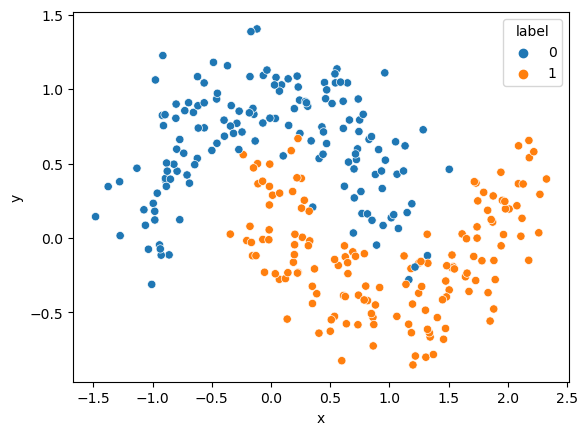

In [3]:
# generate two moons dataset
import seaborn as sns
from sklearn.datasets import make_moons
from matplotlib import pyplot
from pandas import DataFrame
# generate 2d classification dataset
X, y = make_moons(n_samples=300, noise=0.2, random_state=10)
# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))

sns.scatterplot(x = 'x', y = 'y', hue = 'label', data = df )
plt.show()

Import Sequential object: use Sequential API to construct models

In [4]:
from tensorflow.keras.models import Sequential

We want to start defining layers in the model:
    
The most common layer type in neural networks: 
- the **densely** connected layer

<img src = "Images/dense_layer.png" >

In [5]:
# creates densely connected layer object
from tensorflow.keras.layers import Dense

# defines input layer, not necessary in sequential API
# but nice for visualizing network later
from tensorflow.keras.layers import Input 

The Dense object constructor's basic arguments:
- units: number of nodes in layer
- activation: 'relu', 'tanh', 'sigmoid', 'softmax'


Defining the model: a shallow neural network

In [6]:
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu')) # one hidden layer
model.add(Dense(units=1, activation='sigmoid'))

2023-03-20 09:11:58.712565: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Building/compiling the model:

- define objective function and optimizer
- define metric to evaluate train/validation
- build the network connections, weight matrices, initializes, etc.

In [7]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy', 'AUC'])

Some other loss functions:
- multiclass: 'categorical_crossentropy'
- regression: 'mean_squared_error'
- regression: 'mean_absolute_error'

The optimizer:

- Adam Optimizer: 
    - smoothens learning process 
    - uses adaptive learning rate.

A pretty good optimizer. Many other optimizers (NAdam, Adadelta).

#### Optimizers have hyperparameters.

- Can help in training speed up / finding minimum

model.compile(loss = 'binary_crossentropy', optimizer = opt, metrics = ['accuracy', 'AUC'])

In [8]:
from tensorflow.keras.optimizers import Adam

In [9]:
opt = Adam(learning_rate = 0.01) # typical parameter

In [10]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy', 'AUC'])

Metrics: takes in list (calculates metrics in list at each epoch):

Regression:
- 'mae'
- 'mse'
- 'rmse'

Classification:
- 'accuracy'
- 'AUC'
- 'fmeasure'
etc.

Keras provides metrics callable as objects:
- more metrics available
- pass in arguments (probability threshold, etc.)
- build your own metrics.

See documentation for more information.

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                150       
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 201
Trainable params: 201
Non-trainable params: 0
_________________________________________________________________


Train test split the data

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) 

#### .fit() method

- batch_size = # of points you train on in given forward/back-prop loop

typical batch sizes: 1, 32, 64, 128, 256, 512

Batch size:

- Stochastic Gradient Descent: batch_size = 1
- Minibatch Gradient Descent: batch_size = $n_{batch} < N_{train}$
- Batch Gradient Descent: full training set fed in on each forward/back-prop loop

The intuition behind SGD, mini-batch:

SGD: single point $i$
$$ \textbf{w}_{k+1} = \textbf{w}_k - \alpha \nabla_{\textbf{w}}L(y_i, \hat{y}_i) $$

- Using a single point may not be good enough to sample loss function and its gradient. Noisy descent. 
- Can go wrong direction.
- Effectively looping one point at a time. Computationally inefficient.

Mini-batch gives you average of gradient over a sample of the training set: often good enough!

$$ \textbf{w}_{k+1} = \textbf{w}_k - \frac{\alpha}{n_{batch}} \sum_{i=1}^{n_{batch}} \nabla_{\textbf{w}}L(y_i, \hat{y}_i) $$

- Substantially smaller amount of data fed through: still make progress.

Batch gradient descent: all training data.
    
- Will always lower objective on training.
- But depending on dataset:
- manipulating huge matrices just to make one gradient descent step.

<img src = "Images/gradient_descent.png" >

#### Epochs
- Number of times to cycle through **entire** training data.
- Implies number of forward/backprop cycles is: $$ \frac{N_{train}}{n_{batch}} \times \text{epochs} $$

Can train through all epochs defined or:

**Earlystopping callback on training**

- Monitor training loss and set improvement threshold (min_delta)
- Waiting certain number of epochs if no improvements (patience)
- Terminate training

In [13]:
from tensorflow.keras.callbacks import EarlyStopping
trainCallback = EarlyStopping(monitor='loss', min_delta = 1e-6, patience = 5)

**Validation set**

- can feed an external validation set 
- hold out a fraction of training set for validation
- evaluates on train and validation at each epoch

In [14]:
history = model.fit(X_train, y_train, epochs = 10000, batch_size = 32, validation_split = 0.2, callbacks=[trainCallback])

Epoch 1/10000
6/6 [==============================] - 1s 31ms/step - loss: 0.7523 - accuracy: 0.3854 - auc: 0.1806 - val_loss: 0.7144 - val_accuracy: 0.5417 - val_auc: 0.2312
Epoch 2/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.7270 - accuracy: 0.4479 - auc: 0.3114 - val_loss: 0.6918 - val_accuracy: 0.5208 - val_auc: 0.3723
Epoch 3/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.7036 - accuracy: 0.4531 - auc: 0.5117 - val_loss: 0.6699 - val_accuracy: 0.5000 - val_auc: 0.5580
Epoch 4/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.6808 - accuracy: 0.4375 - auc: 0.6713 - val_loss: 0.6495 - val_accuracy: 0.4792 - val_auc: 0.6670
Epoch 5/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.6598 - accuracy: 0.4479 - auc: 0.7614 - val_loss: 0.6300 - val_accuracy: 0.6458 - val_auc: 0.7241
Epoch 6/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.6398 - accuracy: 0.6094 - auc: 0.8118 - val_loss: 0.6127 - 

6/6 [==============================] - 0s 4ms/step - loss: 0.3281 - accuracy: 0.8698 - auc: 0.9421 - val_loss: 0.3517 - val_accuracy: 0.8125 - val_auc: 0.9491
Epoch 49/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.3264 - accuracy: 0.8698 - auc: 0.9428 - val_loss: 0.3499 - val_accuracy: 0.8125 - val_auc: 0.9491
Epoch 50/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.3248 - accuracy: 0.8698 - auc: 0.9431 - val_loss: 0.3483 - val_accuracy: 0.8125 - val_auc: 0.9518
Epoch 51/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.3236 - accuracy: 0.8698 - auc: 0.9433 - val_loss: 0.3464 - val_accuracy: 0.8125 - val_auc: 0.9518
Epoch 52/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.3221 - accuracy: 0.8698 - auc: 0.9437 - val_loss: 0.3451 - val_accuracy: 0.8125 - val_auc: 0.9527
Epoch 53/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.3210 - accuracy: 0.8698 - auc: 0.9444 - val_loss: 0.3428 - val_accura

6/6 [==============================] - 0s 5ms/step - loss: 0.2884 - accuracy: 0.8750 - auc: 0.9542 - val_loss: 0.2868 - val_accuracy: 0.8542 - val_auc: 0.9732
Epoch 96/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.2879 - accuracy: 0.8750 - auc: 0.9545 - val_loss: 0.2858 - val_accuracy: 0.8542 - val_auc: 0.9750
Epoch 97/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.2874 - accuracy: 0.8802 - auc: 0.9548 - val_loss: 0.2849 - val_accuracy: 0.8542 - val_auc: 0.9750
Epoch 98/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.2873 - accuracy: 0.8802 - auc: 0.9545 - val_loss: 0.2825 - val_accuracy: 0.8542 - val_auc: 0.9741
Epoch 99/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.2865 - accuracy: 0.8802 - auc: 0.9549 - val_loss: 0.2819 - val_accuracy: 0.8542 - val_auc: 0.9750
Epoch 100/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.2861 - accuracy: 0.8802 - auc: 0.9552 - val_loss: 0.2809 - val_accur

Epoch 142/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.2683 - accuracy: 0.8854 - auc: 0.9599 - val_loss: 0.2546 - val_accuracy: 0.8750 - val_auc: 0.9795
Epoch 143/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.2681 - accuracy: 0.8854 - auc: 0.9600 - val_loss: 0.2535 - val_accuracy: 0.8750 - val_auc: 0.9804
Epoch 144/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.2678 - accuracy: 0.8854 - auc: 0.9599 - val_loss: 0.2542 - val_accuracy: 0.8750 - val_auc: 0.9804
Epoch 145/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.2672 - accuracy: 0.8854 - auc: 0.9603 - val_loss: 0.2528 - val_accuracy: 0.8750 - val_auc: 0.9804
Epoch 146/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.2666 - accuracy: 0.8854 - auc: 0.9604 - val_loss: 0.2519 - val_accuracy: 0.8750 - val_auc: 0.9804
Epoch 147/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.2663 - accuracy: 0.8854 - auc: 0.9607 - val_loss

Epoch 189/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.2464 - accuracy: 0.8854 - auc: 0.9673 - val_loss: 0.2307 - val_accuracy: 0.8958 - val_auc: 0.9821
Epoch 190/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.2459 - accuracy: 0.8854 - auc: 0.9673 - val_loss: 0.2297 - val_accuracy: 0.8958 - val_auc: 0.9821
Epoch 191/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.2454 - accuracy: 0.8854 - auc: 0.9674 - val_loss: 0.2298 - val_accuracy: 0.8958 - val_auc: 0.9821
Epoch 192/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.2450 - accuracy: 0.8854 - auc: 0.9674 - val_loss: 0.2290 - val_accuracy: 0.8958 - val_auc: 0.9821
Epoch 193/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.2445 - accuracy: 0.8854 - auc: 0.9676 - val_loss: 0.2288 - val_accuracy: 0.8958 - val_auc: 0.9830
Epoch 194/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.2444 - accuracy: 0.8854 - auc: 0.9674 - val_loss

Epoch 236/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.2199 - accuracy: 0.9010 - auc: 0.9733 - val_loss: 0.2054 - val_accuracy: 0.9375 - val_auc: 0.9857
Epoch 237/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.2193 - accuracy: 0.9010 - auc: 0.9734 - val_loss: 0.2048 - val_accuracy: 0.9375 - val_auc: 0.9857
Epoch 238/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.2189 - accuracy: 0.9010 - auc: 0.9735 - val_loss: 0.2039 - val_accuracy: 0.9375 - val_auc: 0.9857
Epoch 239/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.2182 - accuracy: 0.9010 - auc: 0.9739 - val_loss: 0.2041 - val_accuracy: 0.9375 - val_auc: 0.9857
Epoch 240/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.2176 - accuracy: 0.9010 - auc: 0.9741 - val_loss: 0.2038 - val_accuracy: 0.9375 - val_auc: 0.9857
Epoch 241/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.2170 - accuracy: 0.9010 - auc: 0.9742 - val_loss

Epoch 283/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1857 - accuracy: 0.9219 - auc: 0.9821 - val_loss: 0.1727 - val_accuracy: 0.9792 - val_auc: 0.9929
Epoch 284/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.1849 - accuracy: 0.9219 - auc: 0.9825 - val_loss: 0.1722 - val_accuracy: 0.9792 - val_auc: 0.9929
Epoch 285/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1844 - accuracy: 0.9219 - auc: 0.9827 - val_loss: 0.1722 - val_accuracy: 0.9792 - val_auc: 0.9929
Epoch 286/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.1835 - accuracy: 0.9219 - auc: 0.9830 - val_loss: 0.1710 - val_accuracy: 0.9792 - val_auc: 0.9929
Epoch 287/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1831 - accuracy: 0.9219 - auc: 0.9829 - val_loss: 0.1693 - val_accuracy: 0.9792 - val_auc: 0.9929
Epoch 288/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1823 - accuracy: 0.9219 - auc: 0.9831 - val_loss

Epoch 330/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1570 - accuracy: 0.9427 - auc: 0.9887 - val_loss: 0.1464 - val_accuracy: 0.9792 - val_auc: 0.9946
Epoch 331/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1564 - accuracy: 0.9427 - auc: 0.9889 - val_loss: 0.1457 - val_accuracy: 0.9792 - val_auc: 0.9946
Epoch 332/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1560 - accuracy: 0.9427 - auc: 0.9891 - val_loss: 0.1449 - val_accuracy: 0.9792 - val_auc: 0.9946
Epoch 333/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1555 - accuracy: 0.9427 - auc: 0.9892 - val_loss: 0.1454 - val_accuracy: 0.9792 - val_auc: 0.9946
Epoch 334/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1548 - accuracy: 0.9427 - auc: 0.9896 - val_loss: 0.1453 - val_accuracy: 0.9792 - val_auc: 0.9946
Epoch 335/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1545 - accuracy: 0.9427 - auc: 0.9894 - val_loss

Epoch 377/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.1355 - accuracy: 0.9531 - auc: 0.9925 - val_loss: 0.1273 - val_accuracy: 0.9792 - val_auc: 0.9946
Epoch 378/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1350 - accuracy: 0.9531 - auc: 0.9926 - val_loss: 0.1272 - val_accuracy: 0.9792 - val_auc: 0.9946
Epoch 379/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1347 - accuracy: 0.9531 - auc: 0.9926 - val_loss: 0.1268 - val_accuracy: 0.9792 - val_auc: 0.9946
Epoch 380/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.1343 - accuracy: 0.9531 - auc: 0.9926 - val_loss: 0.1263 - val_accuracy: 0.9792 - val_auc: 0.9946
Epoch 381/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1341 - accuracy: 0.9531 - auc: 0.9926 - val_loss: 0.1257 - val_accuracy: 0.9792 - val_auc: 0.9946
Epoch 382/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1334 - accuracy: 0.9531 - auc: 0.9926 - val_loss

Epoch 424/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.1199 - accuracy: 0.9583 - auc: 0.9936 - val_loss: 0.1146 - val_accuracy: 0.9792 - val_auc: 0.9955
Epoch 425/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.1196 - accuracy: 0.9583 - auc: 0.9937 - val_loss: 0.1152 - val_accuracy: 0.9792 - val_auc: 0.9955
Epoch 426/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.1193 - accuracy: 0.9583 - auc: 0.9939 - val_loss: 0.1153 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 427/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1190 - accuracy: 0.9583 - auc: 0.9939 - val_loss: 0.1147 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 428/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.1187 - accuracy: 0.9583 - auc: 0.9938 - val_loss: 0.1141 - val_accuracy: 0.9792 - val_auc: 0.9955
Epoch 429/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1185 - accuracy: 0.9583 - auc: 0.9938 - val_loss

Epoch 471/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1080 - accuracy: 0.9583 - auc: 0.9955 - val_loss: 0.1079 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 472/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1077 - accuracy: 0.9583 - auc: 0.9955 - val_loss: 0.1072 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 473/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1075 - accuracy: 0.9583 - auc: 0.9955 - val_loss: 0.1073 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 474/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1077 - accuracy: 0.9583 - auc: 0.9956 - val_loss: 0.1059 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 475/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1070 - accuracy: 0.9583 - auc: 0.9955 - val_loss: 0.1064 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 476/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1068 - accuracy: 0.9583 - auc: 0.9956 - val_loss

Epoch 518/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0989 - accuracy: 0.9583 - auc: 0.9963 - val_loss: 0.1007 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 519/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0987 - accuracy: 0.9583 - auc: 0.9963 - val_loss: 0.1011 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 520/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0989 - accuracy: 0.9583 - auc: 0.9962 - val_loss: 0.1001 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 521/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0983 - accuracy: 0.9583 - auc: 0.9964 - val_loss: 0.1011 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 522/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0983 - accuracy: 0.9583 - auc: 0.9964 - val_loss: 0.1015 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 523/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0980 - accuracy: 0.9583 - auc: 0.9964 - val_loss

Epoch 565/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0920 - accuracy: 0.9583 - auc: 0.9971 - val_loss: 0.0966 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 566/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0919 - accuracy: 0.9583 - auc: 0.9971 - val_loss: 0.0971 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 567/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0919 - accuracy: 0.9583 - auc: 0.9972 - val_loss: 0.0974 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 568/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0918 - accuracy: 0.9583 - auc: 0.9972 - val_loss: 0.0964 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 569/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0916 - accuracy: 0.9583 - auc: 0.9972 - val_loss: 0.0961 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 570/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.0917 - accuracy: 0.9583 - auc: 0.9971 - val_loss

Epoch 612/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0867 - accuracy: 0.9583 - auc: 0.9974 - val_loss: 0.0946 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 613/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0868 - accuracy: 0.9635 - auc: 0.9974 - val_loss: 0.0939 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 614/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.0867 - accuracy: 0.9635 - auc: 0.9973 - val_loss: 0.0933 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 615/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0865 - accuracy: 0.9635 - auc: 0.9973 - val_loss: 0.0935 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 616/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.0863 - accuracy: 0.9635 - auc: 0.9974 - val_loss: 0.0937 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 617/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0863 - accuracy: 0.9635 - auc: 0.9974 - val_loss

Epoch 659/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0825 - accuracy: 0.9635 - auc: 0.9975 - val_loss: 0.0928 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 660/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0825 - accuracy: 0.9635 - auc: 0.9975 - val_loss: 0.0927 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 661/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.0822 - accuracy: 0.9635 - auc: 0.9975 - val_loss: 0.0924 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 662/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.0826 - accuracy: 0.9635 - auc: 0.9975 - val_loss: 0.0917 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 663/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.0821 - accuracy: 0.9635 - auc: 0.9975 - val_loss: 0.0921 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 664/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0826 - accuracy: 0.9635 - auc: 0.9975 - val_loss

Epoch 706/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0788 - accuracy: 0.9635 - auc: 0.9977 - val_loss: 0.0919 - val_accuracy: 0.9583 - val_auc: 0.9964
Epoch 707/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0786 - accuracy: 0.9635 - auc: 0.9977 - val_loss: 0.0922 - val_accuracy: 0.9583 - val_auc: 0.9964
Epoch 708/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.0787 - accuracy: 0.9635 - auc: 0.9977 - val_loss: 0.0924 - val_accuracy: 0.9583 - val_auc: 0.9964
Epoch 709/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0783 - accuracy: 0.9635 - auc: 0.9977 - val_loss: 0.0920 - val_accuracy: 0.9583 - val_auc: 0.9964
Epoch 710/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0787 - accuracy: 0.9635 - auc: 0.9977 - val_loss: 0.0912 - val_accuracy: 0.9583 - val_auc: 0.9964
Epoch 711/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.0784 - accuracy: 0.9635 - auc: 0.9977 - val_loss

Epoch 753/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0755 - accuracy: 0.9635 - auc: 0.9978 - val_loss: 0.0903 - val_accuracy: 0.9583 - val_auc: 0.9964
Epoch 754/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0757 - accuracy: 0.9635 - auc: 0.9978 - val_loss: 0.0899 - val_accuracy: 0.9583 - val_auc: 0.9964
Epoch 755/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0751 - accuracy: 0.9635 - auc: 0.9978 - val_loss: 0.0905 - val_accuracy: 0.9583 - val_auc: 0.9964
Epoch 756/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0754 - accuracy: 0.9688 - auc: 0.9978 - val_loss: 0.0917 - val_accuracy: 0.9583 - val_auc: 0.9964
Epoch 757/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0751 - accuracy: 0.9688 - auc: 0.9978 - val_loss: 0.0914 - val_accuracy: 0.9583 - val_auc: 0.9964
Epoch 758/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0751 - accuracy: 0.9688 - auc: 0.9978 - val_loss

Epoch 800/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.0728 - accuracy: 0.9688 - auc: 0.9977 - val_loss: 0.0905 - val_accuracy: 0.9583 - val_auc: 0.9964
Epoch 801/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0728 - accuracy: 0.9688 - auc: 0.9977 - val_loss: 0.0907 - val_accuracy: 0.9583 - val_auc: 0.9964
Epoch 802/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0728 - accuracy: 0.9688 - auc: 0.9978 - val_loss: 0.0918 - val_accuracy: 0.9583 - val_auc: 0.9964
Epoch 803/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0729 - accuracy: 0.9688 - auc: 0.9977 - val_loss: 0.0907 - val_accuracy: 0.9583 - val_auc: 0.9964
Epoch 804/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0726 - accuracy: 0.9688 - auc: 0.9977 - val_loss: 0.0908 - val_accuracy: 0.9583 - val_auc: 0.9964
Epoch 805/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0726 - accuracy: 0.9688 - auc: 0.9977 - val_loss

Epoch 847/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0705 - accuracy: 0.9688 - auc: 0.9977 - val_loss: 0.0910 - val_accuracy: 0.9583 - val_auc: 0.9946
Epoch 848/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.0703 - accuracy: 0.9688 - auc: 0.9977 - val_loss: 0.0911 - val_accuracy: 0.9583 - val_auc: 0.9946
Epoch 849/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0703 - accuracy: 0.9688 - auc: 0.9976 - val_loss: 0.0918 - val_accuracy: 0.9583 - val_auc: 0.9946
Epoch 850/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0704 - accuracy: 0.9688 - auc: 0.9977 - val_loss: 0.0914 - val_accuracy: 0.9583 - val_auc: 0.9946
Epoch 851/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0704 - accuracy: 0.9688 - auc: 0.9976 - val_loss: 0.0915 - val_accuracy: 0.9583 - val_auc: 0.9946
Epoch 852/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.0704 - accuracy: 0.9688 - auc: 0.9977 - val_loss

In [15]:
# predict method outputs probability of
# being class 1
y_proba = model.predict(X_test) 
y_proba[0:5]

2/2 [==============================] - 0s 1ms/step


array([[9.9955249e-01],
       [9.9700147e-01],
       [9.7717762e-01],
       [9.9836004e-01],
       [1.0604923e-05]], dtype=float32)

In [16]:
# getting class predictions
y_pred = (y_proba > 0.5).astype('int')
y_pred[0:5]

array([[1],
       [1],
       [1],
       [1],
       [0]])

In [17]:
# returns loss + results of metrics used
_, test_accuracy, test_AUC = model.evaluate(X_test, y_test, verbose=0)
print(test_accuracy, test_AUC)

0.9666666388511658 0.9988776445388794


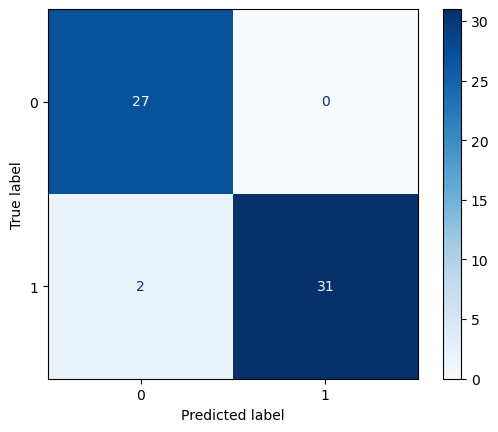

In [18]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot(cmap=plt.cm.Blues)
plt.show()

View decision boundary

80/80 [==============================] - 0s 466us/step


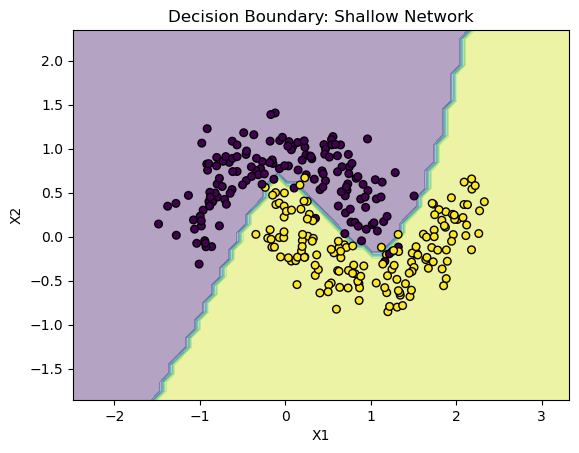

In [19]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

f, ax = plt.subplots()

Z = (model.predict(np.c_[xx.ravel(), yy.ravel()]) > 0.5).astype('int')
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, alpha=0.4)
ax.scatter(X[:, 0], X[:, 1], c = y, s=30, edgecolor="k")
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_title('Decision Boundary: Shallow Network')
plt.show()

The model object returns a history method:
- history attribute is a dictionary storing:
   - training/validation losses.
   - metrics on train/validation sets.

In [20]:
train_accuracy = history.history['loss']
validation_accuracy = history.history['val_loss']
train_history = pd.DataFrame(history.history)
train_history.index.name = 'epochs'
train_history.head()

,loss,accuracy,auc,val_loss,val_accuracy,val_auc
epochs,,,,,,
0,0.752342,0.385417,0.180648,0.714371,0.541667,0.231250
1,0.726983,0.447917,0.311443,0.691812,0.520833,0.372321
2,0.703557,0.453125,0.511672,0.669930,0.500000,0.558036
3,0.680825,0.437500,0.671266,0.649460,0.479167,0.666964
4,0.659816,0.447917,0.761427,0.629982,0.645833,0.724107


Plotting history:

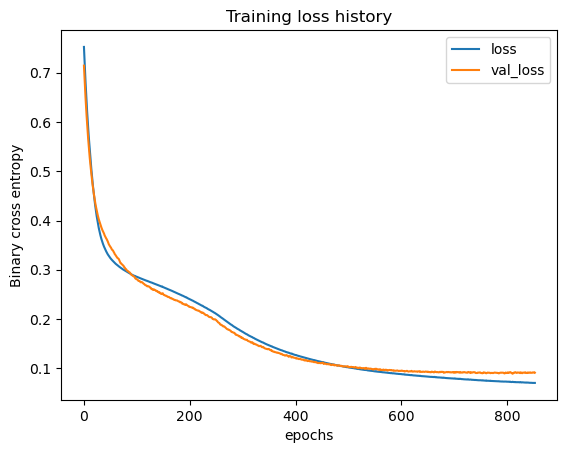

In [21]:
col_list = ['loss', 'val_loss']
train_history[col_list].plot()
plt.ylabel('Binary cross entropy')
plt.title('Training loss history')
plt.show()

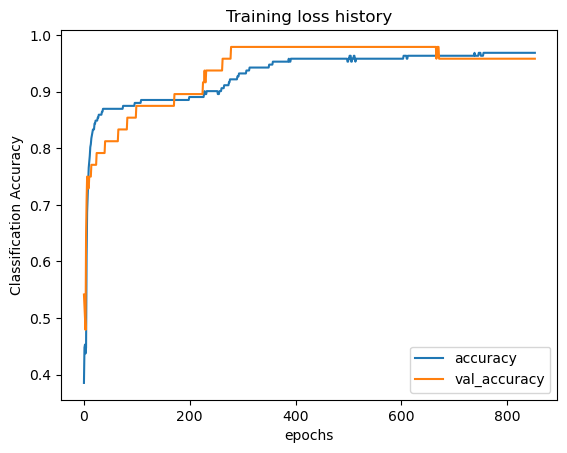

In [22]:
col_list = ['accuracy', 'val_accuracy']
train_history[col_list].plot()
plt.ylabel('Classification Accuracy')
plt.title('Training loss history')
plt.show()

#### Using neural networks to solve some harder problems

#### Image classificaton of hand-written digits

- The MNIST dataset: a classic benchmark for neural network image classification

In [23]:
from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical # for target labels
from tensorflow.keras.layers import Flatten # takes 2D input and turns into 1D array

In [24]:
# load in the data
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

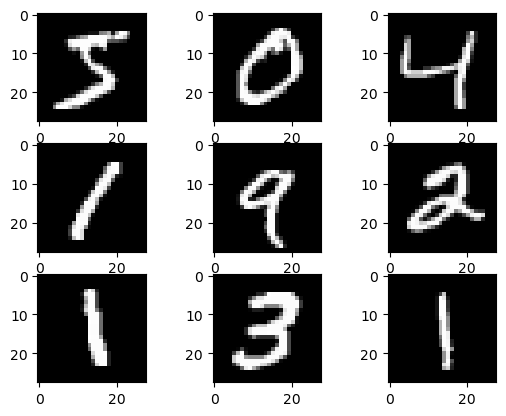

In [25]:
for i in range(9):  
    plt.subplot(330 + 1 + i)
    plt.imshow(x_train[i], cmap=pyplot.get_cmap('gray'))
plt.show()

Good practice to normalize/standardize feature inputs:
- makes learning faster (optimization doesn't depend on variable scale)


<img src = "Images/normalize_nn.png" >

Another reason:
- keeping values small helps keeps weights stable

In [26]:
x_train = x_train/255 # normalization
x_test = x_test/255

# Keras requires multi-class labels to be one-hot encoded
y_tr_one_hot = to_categorical(y_train)
y_tt_one_hot = to_categorical(y_test)
y_tt_one_hot

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

#### Sequential model: add another hidden layer

- additional layer will help us learn more complex features
- note: we've added a few more units in first hidden layer as well.

In [27]:
model_images = Sequential()
model_images.add(Flatten(input_shape=(28, 28))) # flattens each 28x28 image into a vector
model_images.add(Dense(32, activation='relu'))
model_images.add(Dense(8, activation='relu'))
model_images.add(Dense(10, activation='softmax')) # number of units = number of target classes

In [28]:
model_images.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'] )

Let's train the model.

- Here we will use **validation** loss: stopping to prevent overfitting.

In [29]:
valcallback = EarlyStopping(monitor='val_loss', mode='min', verbose = 1, patience = 2)

In [30]:
history_mnist = model_images.fit(x_train, y_tr_one_hot, epochs=100, batch_size= 32, validation_split = 0.2, 
                 callbacks = [trainCallback] )

Epoch 1/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.5414 - accuracy: 0.8476 - val_loss: 0.2486 - val_accuracy: 0.9305
Epoch 2/100
1500/1500 [==============================] - 1s 985us/step - loss: 0.2305 - accuracy: 0.9331 - val_loss: 0.1954 - val_accuracy: 0.9450
Epoch 3/100
1500/1500 [==============================] - 1s 985us/step - loss: 0.1814 - accuracy: 0.9477 - val_loss: 0.1732 - val_accuracy: 0.9508
Epoch 4/100
1500/1500 [==============================] - 1s 981us/step - loss: 0.1520 - accuracy: 0.9561 - val_loss: 0.1685 - val_accuracy: 0.9498
Epoch 5/100
1500/1500 [==============================] - 1s 987us/step - loss: 0.1331 - accuracy: 0.9611 - val_loss: 0.1454 - val_accuracy: 0.9583
Epoch 6/100
1500/1500 [==============================] - 1s 994us/step - loss: 0.1182 - accuracy: 0.9647 - val_loss: 0.1452 - val_accuracy: 0.9591
Epoch 7/100
1500/1500 [==============================] - 1s 989us/step - loss: 0.1056 - accuracy: 0.9690 - val_loss: 0.1

Epoch 57/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0092 - accuracy: 0.9970 - val_loss: 0.2868 - val_accuracy: 0.9586
Epoch 58/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0111 - accuracy: 0.9962 - val_loss: 0.2913 - val_accuracy: 0.9591
Epoch 59/100
1500/1500 [==============================] - 1s 985us/step - loss: 0.0099 - accuracy: 0.9969 - val_loss: 0.2891 - val_accuracy: 0.9610
Epoch 60/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0071 - accuracy: 0.9979 - val_loss: 0.3041 - val_accuracy: 0.9603
Epoch 61/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0135 - accuracy: 0.9950 - val_loss: 0.2951 - val_accuracy: 0.9607
Epoch 62/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0074 - accuracy: 0.9976 - val_loss: 0.2939 - val_accuracy: 0.9607
Epoch 63/100
1500/1500 [==============================] - 1s 988us/step - loss: 0.0099 - accuracy: 0.9967 - val_loss: 0.33

In [31]:
# probability for each class
y_proba = model_images.predict(x_test)
y_proba

313/313 [==============================] - 0s 510us/step


array([[2.5996630e-14, 8.5212027e-18, 4.3894324e-12, ..., 1.0000000e+00,
        4.0477379e-13, 1.9360631e-10],
       [1.8153565e-32, 3.0222716e-26, 1.0000000e+00, ..., 1.0784026e-31,
        1.3896206e-34, 0.0000000e+00],
       [1.2370306e-10, 1.0000000e+00, 1.8175291e-13, ..., 4.7438409e-14,
        6.7823036e-10, 9.3667970e-15],
       ...,
       [3.1683992e-27, 2.4590189e-20, 1.5956470e-19, ..., 1.7739503e-13,
        8.6639262e-23, 7.0960382e-13],
       [7.1405319e-20, 2.7135838e-26, 0.0000000e+00, ..., 1.9064275e-34,
        1.7309488e-19, 2.5891222e-26],
       [1.9153221e-25, 2.7696366e-35, 9.4645447e-19, ..., 0.0000000e+00,
        7.1241706e-30, 0.0000000e+00]], dtype=float32)

In [32]:
model_images.evaluate(x_test, y_tt_one_hot, verbose = 0)

[0.30619922280311584, 0.9628000259399414]

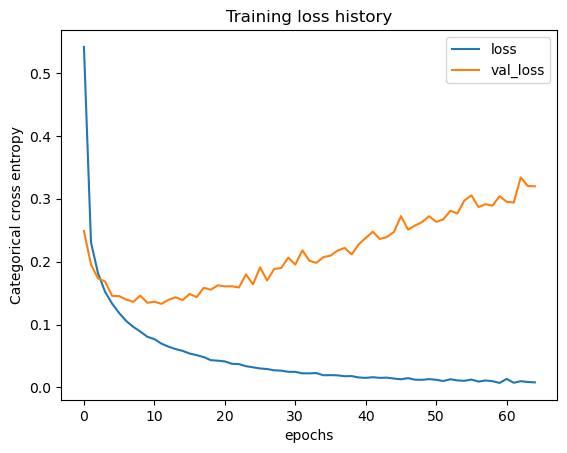

In [33]:
train_mnist_history = pd.DataFrame(history_mnist.history)
train_mnist_history.index.name = 'epochs'

col_list = ['loss', 'val_loss']
train_mnist_history[col_list].plot()
plt.ylabel('Categorical cross entropy')
plt.title('Training loss history')
plt.show()

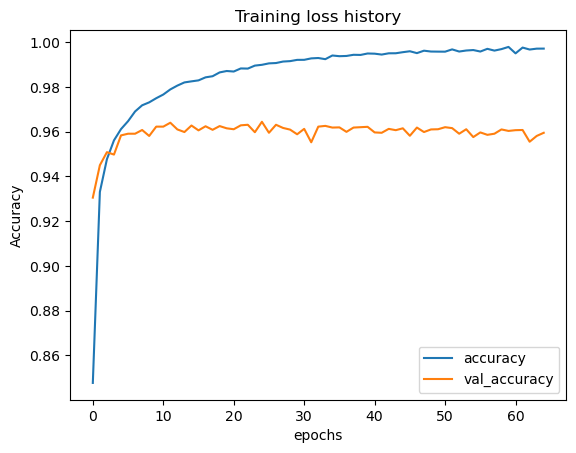

In [34]:
col_list = ['accuracy', 'val_accuracy']
train_mnist_history[col_list].plot()
plt.ylabel('Accuracy')
plt.title('Training loss history')
plt.show()

Clearly, some overfitting.

Getting the class predictions from softmax probabilities.

In [35]:
# argmax axis = -1 gets the column index of maximum probability for each row.
# column index corresponds to digit classes (numbers 0 -9)
predicted = np.argmax(y_proba, axis=-1)
predicted

array([7, 2, 1, ..., 4, 5, 6])

Let's look at our classifier did on the test set in more detail.

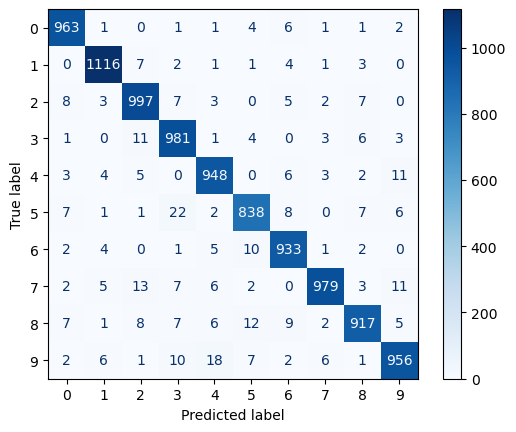

In [36]:
cm_digits = confusion_matrix(y_test, predicted)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm_digits)

disp.plot(cmap=plt.cm.Blues)
plt.show()

Not bad:
- but in the context of many tasks this is not yet a viable system.
- e.g., reading checks, etc

- Next steps: increasing network complexity / train longer but not overfitting
- getting better fitting and test-set generalization

<center><b>Network Regularization</b></center>